## Student's T-Distribution

PDF:
$f(t) = \frac{\Gamma\left(\frac{v+1}{2} \right)}{\sqrt{v\pi} \, \Gamma \left(\frac{v}{2} \right)} \left(1 + \frac{t^2}{v} \right)^{-\frac{v+1}{2}}$

In [1]:
import os 
pi = 3.14159265

x = []
i = -6
while i < 6:
    i += 0.01
    x.append(round(i, 3))
# print(x)

In [2]:
from math import gamma

def numerator(df):
    n = (df+1)/2
    num = gamma(n)
    return num


def denominator(df):
    pi = 3.14159265
    d = (df*pi)**0.5
    n = df/2
    gam = gamma(n)
    denom = d*gam
    return denom


def poly(t, df):
    x = (1 + ((t**2)/df))
    expo = -((df+1)/2)
    polynom = x**expo
    return polynom


def t_probability_distro_function(t, df):
    num = numerator(df)
    denom = denominator(df)
    polynom = poly(t, df)
    pdf = (num/denom)*polynom
    return pdf

In [3]:
import scipy.integrate
negative_infinity = -float('inf')
df = 1

t_table = []

while df <= 120:
    for row in x:
        probability, error = scipy.integrate.quad(
            t_probability_distro_function, 
            negative_infinity,
            row,
            args=(df))
        
        t_table.append([df, row, round(probability, 5)])
    df += 1
    
import csv
folder_path = r"..\..\data"
csv_file_path = os.path.join(folder_path, "t_table.csv")
with open(csv_file_path, 'w', newline='') as tTableFile:
    tTableWriter = csv.writer(tTableFile, delimiter=',')
    for row in t_table:
        tTableWriter.writerow(row)

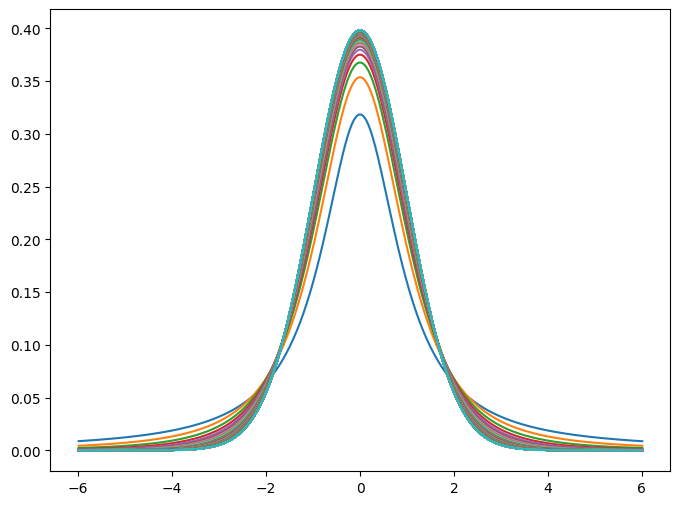

In [4]:
## plot

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

df = 1
while df <= 120:
    y = []
    for row in x:
        pdf = t_probability_distro_function(row, df)
        y.append(pdf)
    
    plt.plot(x, y)
    df += 1

plt.show()